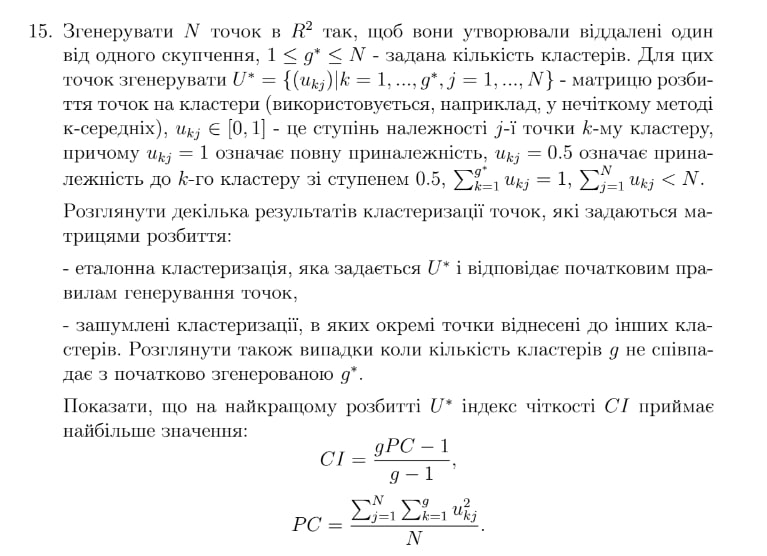

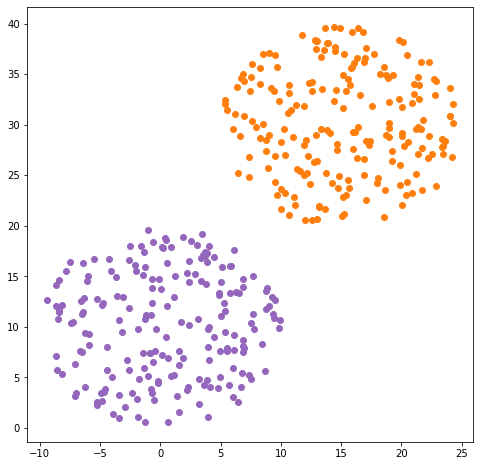

In [102]:
import numpy as np  
import matplotlib.pyplot as plt
import math
import random

random.seed(17) 
plt.figure(figsize = (8, 8))

N = 200
center1 = [15, 30]
center2 = [0, 10]
radius = 10

def clusterization(center:"list", radius:"int", N:"int") -> "np.ndarray":
    x = []
    y = []
    u = []
    for i in range(N):
        theta = random.uniform(0, 2*math.pi)
        r = random.uniform(0, radius)
        x.append(center[0] + math.sqrt(r*radius)*math.cos(theta))
        y.append(center[1] + math.sqrt(r*radius)*math.sin(theta))
        u.append(1)
    return x, y, u


x1, y1, u1 = clusterization(center1, radius, N)

x2, y2, u2 = clusterization(center2, radius, N)



plt.scatter(x1, y1, c='#ff7f0e')
plt.scatter(x2, y2, c='#9467bd')
plt.show()

Пошук CI для еталонної кластеризації 

In [103]:
u_1 = np.append(np.array(u1), np.zeros(len(u2)))
u_2 = np.append(np.zeros(len(u1)), np.array(u2))

matrix = np.vstack((u_1, u_2))

def countpc(matrix):
    pc = 0
    for i in matrix:
        for j in i:
            pc += j**2
    return (pc/np.shape(matrix)[1])

def countci(matrix):
    g = np.shape(matrix)[0]
    ci = (g*countpc(matrix)-1)/(g-1)
    return ci

ci = countci(matrix)

print(ci)

1.0


In [104]:
k = [[4, 5], [3, 8]]
pc = 0
for i in k:
    print(i)
    for j in i:
        pc += j
        print(j)
pc
np.shape(k)

[4, 5]
4
5
[3, 8]
3
8


(2, 2)

Зашумлена кластеризація

In [105]:
def clusterization_2(center:"list", radius:"int", N:"int") -> "np.ndarray":
    x = []
    y = []
    u = []
    for i in range(N):
        theta = random.uniform(0, 2*math.pi)
        r = random.uniform(0, radius)
        x.append(center[0] + math.sqrt(r*radius)*math.cos(theta))
        y.append(center[1] + math.sqrt(r*radius)*math.sin(theta))
        distance = math.sqrt((x[i] - center[0])**2 + (y[i] - center[1])**2)
        u.append(1 - distance/radius)
    return x, y, u

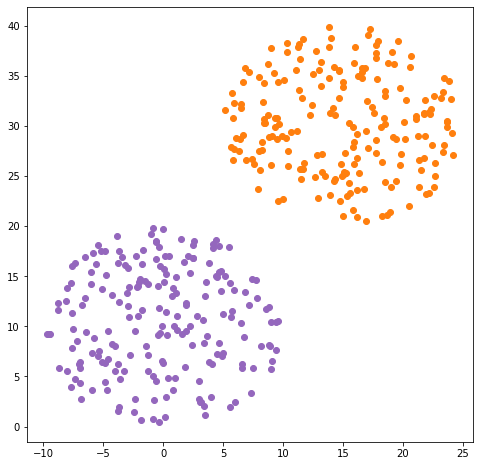

In [106]:
random.seed(17)
plt.figure(figsize = (8, 8))

x1, y1, u1 = clusterization_2(center1, radius, N)

x2, y2, u2 = clusterization_2(center2, radius, N)

plt.scatter(x1, y1, c='#ff7f0e')
plt.scatter(x2, y2, c='#9467bd')
plt.show()

Пошук CI для зашумленої кластеризації

In [107]:
# u_1 = np.append(np.array(u1), np.zeros(len(u2)))
# u_2 = np.append(np.zeros(len(u1)), np.array(u2))

u_1 = np.append(np.array(u1), np.ones(len(u1)) - np.array(u1))
u_2 = np.append(np.ones(len(u2)) - np.array(u2), np.array(u2))

matrix = np.vstack((u_1, u_2))

ci = countci(matrix)

print(ci)

0.33079433018695514
